#Linear Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
plt.rcParams['figure.facecolor'] = 'white'

In [ ]:
class LinearRegression():
 
  def __init__(self, learning_rate = 0.01, epochs=1000, plot=False):
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.weights = None
    self.bias = None
    self.cost = np.zeros((self.epochs))
    self.plot=plot
 
 
  def cost_function(self,x,y,weights,bias):
    y_hat = np.dot(x, weights) + bias
    c = sum((y - y_hat)**2) / y.shape[0]
    return c
    
  def plot_function(self,x,y,y_hat,Cost):
    #w = np.linspace(-12,12,self.epochs)
    w = np.linspace(-4, 4, self.epochs)
    
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.scatter(x,y)
    plt.plot(x,y_hat, color = 'red')
    plt.title('Gradient Decent trying hard to fit line')
 
    plt.subplot(1,2,2)
    plt.plot(w, w**2)
    plt.scatter(self.weights,Cost, color = 'red')
    plt.axhline(0, color='black', linestyle=':')
    plt.axvline(0, color='black', linestyle=':')
    plt.title('cost function')
    plt.show()
  
 
  def fit(self,x,y):
    
    # x.shape = (500,10)   500 samples and 10 features
    n_samples = x.shape[0]
    n_features = x.shape[1]        
    
    self.weights = np.zeros((n_features,))               # shape = (10,)
    self.bias = np.zeros(1)                              #shape = (1,)
        
 
    for epoch in range(self.epochs): 
      
      y_hat = self.predict(x)       #shape = (500,)
 
      self.cost[epoch] = self.cost_function(x, y, self.weights, self.bias)
 
      if epoch % 100 == 0:
        print('epoch:',epoch,'cost:',self.cost[epoch])
        if self.plot:
          self.plot_function(x,y,y_hat, self.cost[epoch])
 
      # for dot product (10,500)*(500,)
      dw = (-2/n_samples) * np.dot(x.T, (y - y_hat))           #shape = (10,)
      db = (-2/n_samples) * sum(y - y_hat)                     #shape = (1,)
 
      self.weights -= self.learning_rate * dw
      self.bias -= self.learning_rate * db
  
    self.intercept_ = self.bias
    self.coef_ = self.weights
    self.cost_ = self.cost
    
 
 
  def predict(self,x):
    return np.dot(x,self.weights) + self.bias             # for dot product (500,10)*(10,)  + 1
 
  def score(self,y_true,y_pred):
    u = ((y_true - y_pred) ** 2).sum()
    v = ((y_true - y_true.mean()) ** 2).sum()
    score = 1 - u/v
    return score

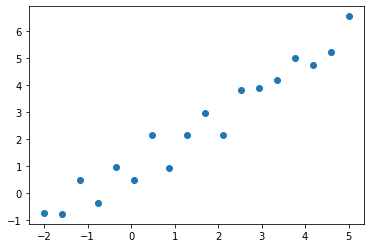

In [ ]:
x = np.linspace(-2,5,18)
y = x  + np.random.normal(1,.5,size=18)
 
plt.scatter(x,y)
plt.show()

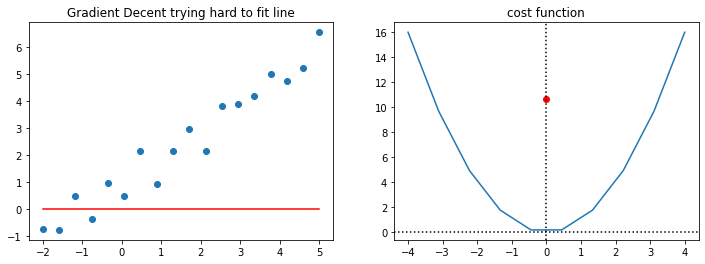

epoch: 0 cost: 10.651952296006076


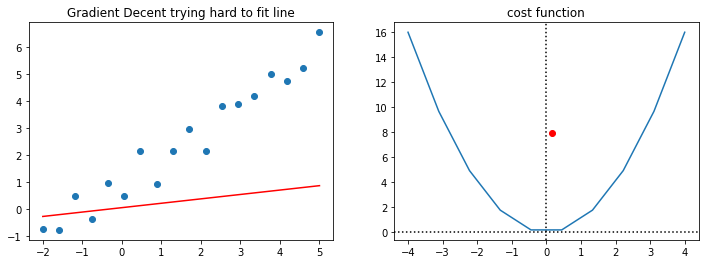

epoch: 1 cost: 7.9527869753281015


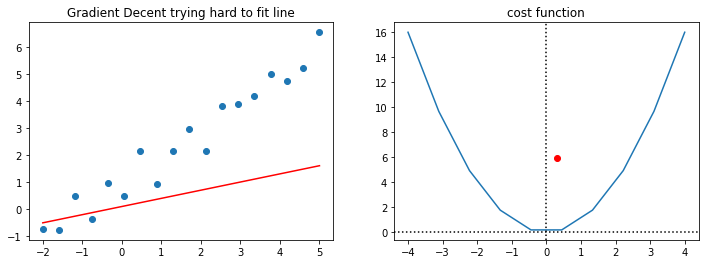

epoch: 2 cost: 5.971129574303535


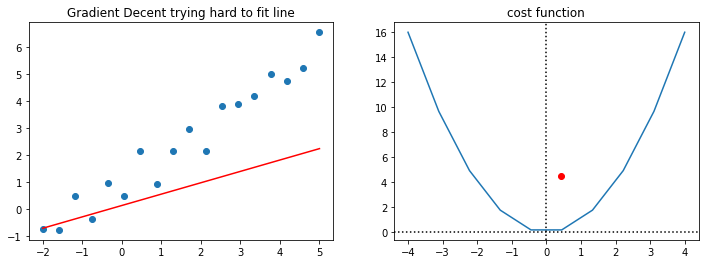

epoch: 3 cost: 4.515805039310085


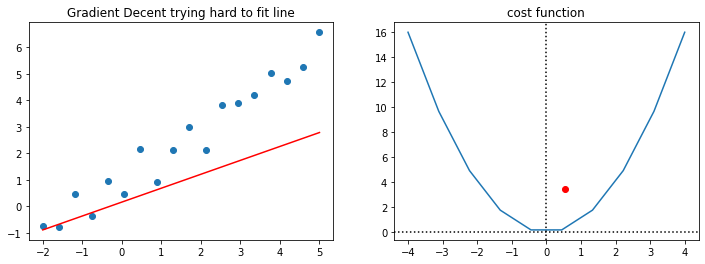

epoch: 4 cost: 3.4465868167170473


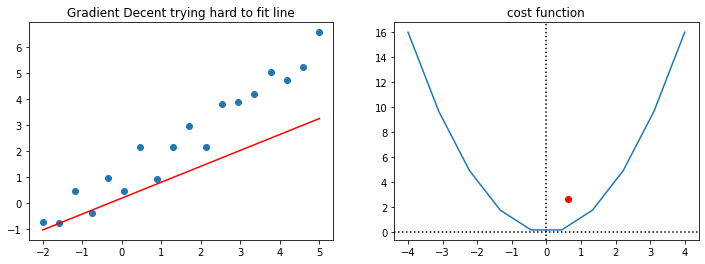

epoch: 5 cost: 2.6606187012157623


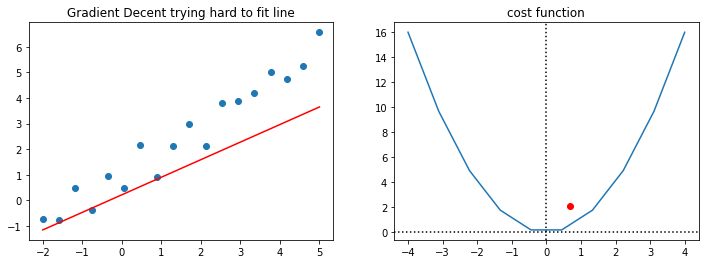

epoch: 6 cost: 2.082455369056665


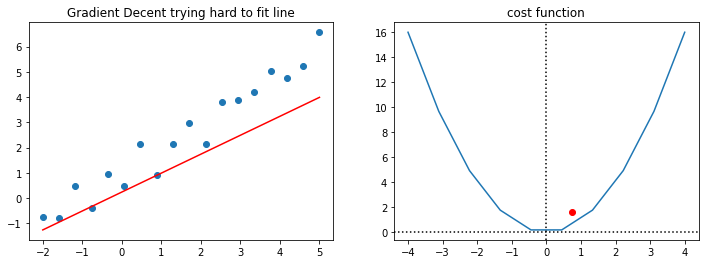

epoch: 7 cost: 1.6567571878381473


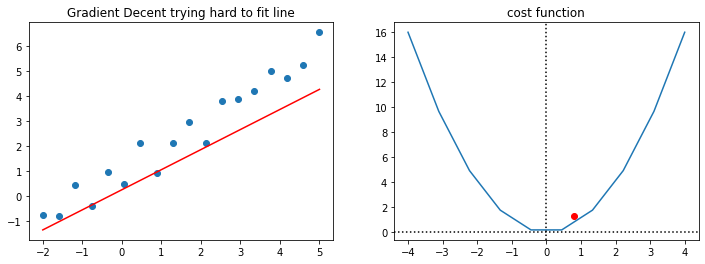

epoch: 8 cost: 1.3429319170062481


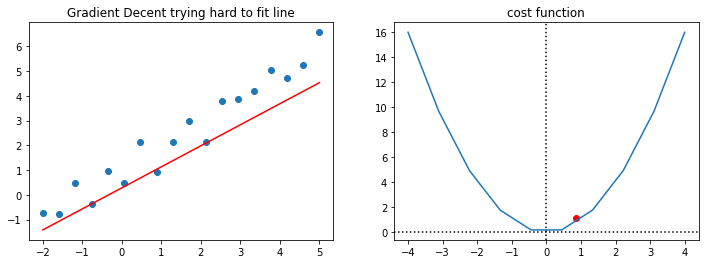

epoch: 9 cost: 1.1112044371892469


In [ ]:
m = LinearRegression(epochs= 10)
m.fit(x[:,np.newaxis],y)

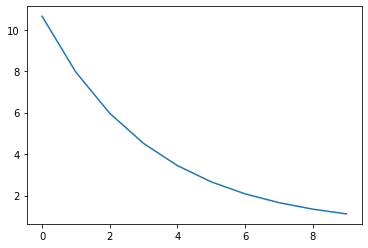

In [ ]:
plt.plot(m.cost_)
plt.show()

##Comparing with scikit learn

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


dataset = load_boston()

X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(\
                X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#training
my_regressor = LinearRegression(learning_rate= 0.1)
my_regressor.fit(X_train, y_train)

sklearn_regressor = lr()
sklearn_regressor.fit(X_train, y_train)

#training prediction
my_pred_train = my_regressor.predict(X_train)
sklearn_pred_train = sklearn_regressor.predict(X_train)

my_train_accuracy = my_regressor.score(y_train, my_pred_train)
sklearn_train_accuracy = sklearn_regressor.score(X_train, y_train)

#testing prediction
my_pred_test = my_regressor.predict(X_test)
sklearn_pred_test = sklearn_regressor.predict(X_test)

my_test_accuracy = my_regressor.score(y_test, my_pred_test)
sklearn_test_accuracy = sklearn_regressor.score(X_test, y_test)

df = pd.DataFrame([[my_train_accuracy, sklearn_train_accuracy],
              [my_test_accuracy, sklearn_test_accuracy]],
             ['Training Accuracy', 'Test Accuracy'],    
             ['My Implementation', 'Sklearn\'s Implementation'])

epoch: 0 cost: 617.6244632768361
epoch: 100 cost: 33.37192000284885
epoch: 200 cost: 27.235132510631644
epoch: 300 cost: 25.261233492695464
epoch: 400 cost: 24.424128176721396
epoch: 500 cost: 23.975953996882705
epoch: 600 cost: 23.68659933256609
epoch: 700 cost: 23.476013692784935
epoch: 800 cost: 23.312519211104526
epoch: 900 cost: 23.181388985784043


In [ ]:
df

,My Implementation,Sklearn's Implementation
Training Accuracy,0.737481,0.743500
Test Accuracy,0.696944,0.711226


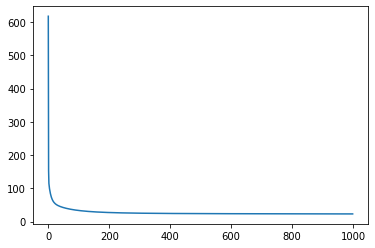

In [ ]:
plt.plot(my_regressor.cost_)
plt.show()

In [ ]:
print('my_regressor intercept_: ',my_regressor.intercept_)
print('my_regressor coef_: ',my_regressor.coef_)
print()
print('my_regressor intercept_: ',sklearn_regressor.intercept_)
print('my_regressor coef_: ',sklearn_regressor.coef_)

my_regressor intercept_:  [20.07522001]
my_regressor coef_:  [ -6.95562344   2.13449696   1.24457584   3.26645898  -4.50868219
  23.12417068  -0.47361463  -9.76810888   3.54635637  -3.11137996
  -7.67585886   5.69712209 -19.04440881]

my_regressor intercept_:  26.02822932407367
my_regressor coef_:  [-11.87445333   3.40184679   1.31383578   3.11983512  -7.4926916
  19.94924862  -1.0507031  -15.24168408   5.58272882  -4.55997081
  -8.56044096   4.67731048 -19.82738646]


#Ridge

In [ ]:
class Ridge():
 
  def __init__(self, learning_rate = 0.01, alpha = 0.01, epochs=1000):
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.weights = None
    self.bias = None
    self.alpha = alpha
    self.cost = np.zeros((self.epochs))
 
 
  def cost_function(self,x,y):
    y_hat = np.dot(x, self.weights) + self.bias
    c = (sum((y - y_hat)**2) / y.shape[0]) + self.alpha * np.linalg.norm(self.weights,2)
    return c
    
 
  def fit(self,x,y):
    
    # x.shape = (500,10)   500 samples and 10 features
    n_samples = x.shape[0]
    n_features = x.shape[1]        
    
    self.weights = np.zeros((n_features,))               # shape = (10,)
    self.bias = np.zeros(1)                              #shape = (1,)
        
 
    for epoch in range(self.epochs): 
      
      y_hat = self.predict(x)       #shape = (500,)

      self.cost[epoch] = self.cost_function(x, y)
      if epoch % 50 == 0:
        print('epoch:',epoch,'cost:',self.cost[epoch])

      # for dot product (10,500)*(500,)
      dw = (-2/n_samples) * (np.dot(x.T, (y - y_hat)) + 2 * self.alpha * self.weights)         #shape = (10,)
      db = (-2/n_samples) * sum(y - y_hat)                     #shape = (1,)
 
      self.weights -= self.learning_rate * dw
      self.bias -= self.learning_rate * db
  
 
    self.intercept_ = self.bias
    self.coef_ = self.weights
    self.cost_ = self.cost
 
 
  def predict(self,x):
    return np.dot(x,self.weights) + self.bias             # for dot product (500,10)*(10,)  + 1
 
  def score(self,y_true,y_pred):
    u = ((y_true - y_pred) ** 2).sum()
    v = ((y_true - y_true.mean()) ** 2).sum()
    score = 1 - u/v
    return score

##Comparing with scikit learn

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lr
from sklearn.linear_model import Ridge as rd
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


dataset = load_boston()

X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(\
                X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#training
my_regressor = Ridge(learning_rate= 0.1)
my_regressor.fit(X_train, y_train)

sklearn_regressor = rd()
sklearn_regressor.fit(X_train, y_train)

#training prediction
my_pred_train = my_regressor.predict(X_train)
sklearn_pred_train = sklearn_regressor.predict(X_train)

my_train_accuracy = my_regressor.score(y_train, my_pred_train)
sklearn_train_accuracy = sklearn_regressor.score(X_train, y_train)

#testing prediction
my_pred_test = my_regressor.predict(X_test)
sklearn_pred_test = sklearn_regressor.predict(X_test)

my_test_accuracy = my_regressor.score(y_test, my_pred_test)
sklearn_test_accuracy = sklearn_regressor.score(X_test, y_test)

df = pd.DataFrame([[my_train_accuracy, sklearn_train_accuracy],
              [my_test_accuracy, sklearn_test_accuracy]],
             ['Training Accuracy', 'Test Accuracy'],    
             ['My Implementation', 'Sklearn\'s Implementation'])

epoch: 0 cost: 617.6244632768361
epoch: 50 cost: 42.20655227330216
epoch: 100 cost: 33.58475163481072
epoch: 150 cost: 29.597018929874313
epoch: 200 cost: 27.499053291905604
epoch: 250 cost: 26.29512320473016
epoch: 300 cost: 25.55546040580965
epoch: 350 cost: 25.072085697201484
epoch: 400 cost: 24.736729905785133
epoch: 450 cost: 24.490408394877022
epoch: 500 cost: 24.299957839557862
epoch: 550 cost: 24.146234142606648
epoch: 600 cost: 24.017890019169606
epoch: 650 cost: 23.90799793823012
epoch: 700 cost: 23.81218087060148
epoch: 750 cost: 23.727561594377583
epoch: 800 cost: 23.65216392843801
epoch: 850 cost: 23.584566817708524
epoch: 900 cost: 23.523701557635803
epoch: 950 cost: 23.468730965935915


In [ ]:
df

,My Implementation,Sklearn's Implementation
Training Accuracy,0.737498,0.738725
Test Accuracy,0.696810,0.711021


In [ ]:
print('my_regressor intercept_: ',my_regressor.intercept_)
print('my_regressor coef_: ',my_regressor.coef_)
print()
print('my_regressor intercept_: ',sklearn_regressor.intercept_)
print('my_regressor coef_: ',sklearn_regressor.coef_)

my_regressor intercept_:  [20.05238523]
my_regressor coef_:  [ -6.98469151   2.13904216   1.26451196   3.25940539  -4.52248455
  23.1788348   -0.47451474  -9.79778987   3.56076326  -3.1193943
  -7.67725585   5.7040758  -19.06360025]

my_regressor intercept_:  25.402289976271437
my_regressor coef_:  [ -7.4663817    2.38008684   0.17208253   3.54080135  -5.50437853
  18.3522545   -0.93379167 -11.51984429   3.76785686  -3.36786613
  -8.26873116   4.47752661 -18.92289026]


#Lasso

In [ ]:
class Lasso():
 
  def __init__(self, learning_rate = 0.01, alpha = 0.1, epochs=1000):
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.weights = None
    self.bias = None
    self.alpha = alpha
    self.cost = np.zeros((self.epochs))
 
 
  def cost_function(self,x,y):
    y_hat = np.dot(x, self.weights) + self.bias
    c = (sum((y - y_hat)**2) / y.shape[0]) + self.alpha * np.linalg.norm(self.weights,1)
    return c
    
 
  def fit(self,x,y):
    
    # x.shape = (500,10)   500 samples and 10 features
    n_samples = x.shape[0]
    n_features = x.shape[1]        
    
    self.weights = np.zeros((n_features,))               # shape = (10,)
    self.bias = np.zeros(1)                              #shape = (1,)
        
 
    for epoch in range(self.epochs): 
      
      y_hat = self.predict(x)       #shape = (500,)

      self.cost[epoch] = self.cost_function(x, y)
      if epoch % 50 == 0:
        print('epoch:',epoch,'cost:',self.cost[epoch])
      
      #loop to update dw
      dw = np.zeros(n_features)
      for i in range(n_features):

        if self.weights[i] > 0:
          # for dot product (10,500)*(500,)
          dw[i] = (-2/n_samples) * (np.dot(x.T, (y - y_hat)) + self.alpha)[i]          #shape = (1,) updating element wise 
        else:
          # for dot product (10,500)*(500,)
          dw[i] = (-2/n_samples) * (np.dot(x.T, (y - y_hat)) - self.alpha)[i]         #shape = (1,) updating element wise

      db = (-2/n_samples) * sum(y - y_hat)                     #shape = (1,)
 
      self.weights -= self.learning_rate * dw
      self.bias -= self.learning_rate * db
  
 
    self.intercept_ = self.bias
    self.coef_ = self.weights
    self.cost_ = self.cost
 
 
  def predict(self,x):
    return np.dot(x,self.weights) + self.bias             # for dot product (500,10)*(10,)  + 1
 
  def score(self,y_true,y_pred):
    u = ((y_true - y_pred) ** 2).sum()
    v = ((y_true - y_true.mean()) ** 2).sum()
    score = 1 - u/v
    return score

##Comparing with scikit learn

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lr
from sklearn.linear_model import Lasso as ls
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


dataset = load_boston()

X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(\
                X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#training
my_regressor = Lasso(learning_rate= 0.1)
my_regressor.fit(X_train, y_train)

sklearn_regressor = ls()
sklearn_regressor.fit(X_train, y_train)

#training prediction
my_pred_train = my_regressor.predict(X_train)
sklearn_pred_train = sklearn_regressor.predict(X_train)

my_train_accuracy = my_regressor.score(y_train, my_pred_train)
sklearn_train_accuracy = sklearn_regressor.score(X_train, y_train)

#testing prediction
my_pred_test = my_regressor.predict(X_test)
sklearn_pred_test = sklearn_regressor.predict(X_test)

my_test_accuracy = my_regressor.score(y_test, my_pred_test)
sklearn_test_accuracy = sklearn_regressor.score(X_test, y_test)

df = pd.DataFrame([[my_train_accuracy, sklearn_train_accuracy],
              [my_test_accuracy, sklearn_test_accuracy]],
             ['Training Accuracy', 'Test Accuracy'],    
             ['My Implementation', 'Sklearn\'s Implementation'])

epoch: 0 cost: 617.6244632768361
epoch: 50 cost: 46.86015294702274
epoch: 100 cost: 38.953368302025474
epoch: 150 cost: 35.3875666513401
epoch: 200 cost: 33.79223014093156
epoch: 250 cost: 32.937604274112644
epoch: 300 cost: 32.455538836723
epoch: 350 cost: 32.172921404795616
epoch: 400 cost: 32.01174525144392
epoch: 450 cost: 31.946059542123223
epoch: 500 cost: 31.914519567370785
epoch: 550 cost: 31.903002894371976
epoch: 600 cost: 31.903612109780475
epoch: 650 cost: 31.911859647954074
epoch: 700 cost: 31.93274249890893
epoch: 750 cost: 31.968199228804124
epoch: 800 cost: 32.00405589505826
epoch: 850 cost: 32.0399523015942
epoch: 900 cost: 32.07567415031672
epoch: 950 cost: 32.11109012797378


In [ ]:
df

,My Implementation,Sklearn's Implementation
Training Accuracy,0.737537,0.263436
Test Accuracy,0.696994,0.245663


In [ ]:
print('my_regressor intercept_: ',my_regressor.intercept_)
print('my_regressor coef_: ',my_regressor.coef_)
print()
print('my_regressor intercept_: ',sklearn_regressor.intercept_)
print('my_regressor coef_: ',sklearn_regressor.coef_)

my_regressor intercept_:  [20.07583463]
my_regressor coef_:  [ -6.99268977   2.15064686   1.27155746   3.26568451  -4.53381061
  23.13037564  -0.47477336  -9.79528257   3.57606248  -3.13966363
  -7.68222251   5.70530257 -19.04678102]

my_regressor intercept_:  25.94551695418758
my_regressor coef_:  [-0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -0.39549401 -0.          0.
 -9.36790973]


#I am Happy and satisfied now. :)